# Getting data from the web - APIs

### HTTP requests and responses

An easy method of getting data for machine learning applications is to use Web based Application Programming Interfaces (APIs). A web based API is a structured way to expose specific functionality and provide data access to users. The main limitation of this form of data gathering is that in order to access such data, the website resource needs to support this functionality and make it available. 

In order to interact with an API you usually make an HTTP request to a specific URL (an "endpoint") and get the data back encapsulated in an HTTP response. The most relevant request method to retrieve information is GET (but there are other methods: POST, PUT, DELETE that provide additional functionality to the API). The HTTP response payload from the server serving the data is usually in JSON or XML format.

Making HTTP requests within Python is very easy using the  `requests` library.

In [2]:
import requests
response = requests.get('http://example.com')

Now, we have an HTTP Response object called `response`. We can get all the information we need about the HTTP response from this object.

In [3]:
response.status_code

200

In [4]:
response.headers

{'Content-Encoding': 'gzip', 'Accept-Ranges': 'bytes', 'Cache-Control': 'max-age=604800', 'Content-Type': 'text/html; charset=UTF-8', 'Date': 'Thu, 07 Feb 2019 03:58:38 GMT', 'Etag': '"1541025663"', 'Expires': 'Thu, 14 Feb 2019 03:58:38 GMT', 'Last-Modified': 'Fri, 09 Aug 2013 23:54:35 GMT', 'Server': 'ECS (oxr/83B7)', 'Vary': 'Accept-Encoding', 'X-Cache': 'HIT', 'Content-Length': '606'}

In [5]:
response.headers['Server']

'ECS (oxr/83B7)'

In [6]:
response.encoding

'UTF-8'

In [7]:
response.cookies

<RequestsCookieJar[]>

We can read the payload content of the server's HTTP response, in this case an HTML document in minified form as exists in http://example.com:

In [8]:
response.text # the Payload of the HTTP response, in this case containing the HTML of the page

'<!doctype html>\n<html>\n<head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8" />\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <style type="text/css">\n    body {\n        background-color: #f0f0f2;\n        margin: 0;\n        padding: 0;\n        font-family: "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;\n        \n    }\n    div {\n        width: 600px;\n        margin: 5em auto;\n        padding: 50px;\n        background-color: #fff;\n        border-radius: 1em;\n    }\n    a:link, a:visited {\n        color: #38488f;\n        text-decoration: none;\n    }\n    @media (max-width: 700px) {\n        body {\n            background-color: #fff;\n        }\n        div {\n            width: auto;\n            margin: 0 auto;\n            border-radius: 0;\n            padding: 1em;\n        }\n    }\n    </style>    \n</head>\n\n<body>\n<div>\n

this is how you make an HTTP POST request:

In [15]:
response = requests.post('http://httpbin.org/post', data = {'OP':'Otago Polytechnic'})
response.status_code

200

The server at `http://httpbin.org` has been configure to return an HTTP response to HTTP POST Requests. The HTTP response payload `http://httpbin.org` contains among other data the payload we uploaded in our HTTP request, in our case: the `data` dictionary.

In [19]:
response.text

'{\n  "args": {}, \n  "data": "", \n  "files": {}, \n  "form": {\n    "OP": "Otago Polytechnic"\n  }, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Connection": "close", \n    "Content-Length": "20", \n    "Content-Type": "application/x-www-form-urlencoded", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.19.1"\n  }, \n  "json": null, \n  "origin": "202.49.0.118", \n  "url": "http://httpbin.org/post"\n}\n'

Other HTTP request types: PUT, DELETE, HEAD and OPTIONS are all just as simple:

In [20]:
response = requests.put('http://httpbin.org/put', data = {'key':'value'}) #Returns PUT data.
response = requests.delete('http://httpbin.org/delete') #/delete Returns DELETE data
response = requests.head('http://httpbin.org/get')
response = requests.options('http://httpbin.org/get')

You often want to send some sort of data in the URL's query string. If you were constructing the URL by hand, this data would be given as key/value pairs in the URL after a question mark, e.g. `httpbin.org/get?key=val`. The `requests` library allows you to provide these arguments as a dictionary of strings, using the `params` keyword argument. As an example, if you wanted to pass `key1=value1` and `key2=value2` to `httpbin.org/get`, you would use the following code:

In [21]:
payload = {'key1': 'value1', 'key2': 'value2'}
r = requests.get('http://httpbin.org/get', params=payload)

You can see that the URL has been correctly encoded by printing the URL:

In [22]:
print(r.url)

http://httpbin.org/get?key1=value1&key2=value2


If you'd like to add HTTP headers to a request, simply pass in a dict to the headers parameter.

In [23]:
url = 'http://httpbin.org/put'
headersDictionary = {'user-agent': 'I\'m a fake browser'}

r = requests.get(url, headers=headersDictionary)
r.request.headers

{'user-agent': "I'm a fake browser", 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

Typically, you want to send some form-encoded data — much like an HTML form. To do this, simply pass a dictionary to the `data` argument. Your dictionary of data will automatically be form-encoded when the request is made:

In [24]:
payload = {'key1': 'value1', 'key2': 'value2'}

response = requests.post("http://httpbin.org/post", data=payload)
print(r.text)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<title>405 Method Not Allowed</title>
<h1>Method Not Allowed</h1>
<p>The method is not allowed for the requested URL.</p>



### Binary Response Content

You can also access the response body as bytes, for non-text requests. For example, to create an image from binary data returned by a request for an image located at https://i.ytimg.com/vi/kZw-jgCRPeE/maxresdefault.jpg

![](https://i.ytimg.com/vi/kZw-jgCRPeE/maxresdefault.jpg)

you can use the following code:

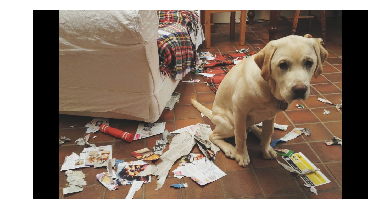

In [25]:
%matplotlib inline
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

response = requests.get('https://i.ytimg.com/vi/kZw-jgCRPeE/maxresdefault.jpg')

binaryImage = Image.open(BytesIO(response.content))
binaryImage.save('./imageRetrievedFromTheWeb.png')
imgplot = plt.imshow(binaryImage)
plt.axis('off')
plt.show()

### Retrieving Data from APIs

Let's now use HTTP requests and responses to retrieve data from APIs. `requests` objects have a builtin JSON decoder, in case you're dealing with JSON data.

Let's query the Food and Drugs administration (FDA) of the United States for how many adverse effects have been recorded for the category of drugs known as *nonsteroidal anti-inflammatory drugs*.

In [26]:
import requests
response = requests.get('https://api.fda.gov/drug/event.json?search=patient.drug.openfda.pharm_class_epc:"nonsteroidal+anti-inflammatory+drug"&count=patient.reaction.reactionmeddrapt.exact')
response.json()

{'meta': {'disclaimer': 'Do not rely on openFDA to make decisions regarding medical care. While we make every effort to ensure that data is accurate, you should assume all results are unvalidated. We may limit or otherwise restrict your access to the API in line with our Terms of Service.',
  'terms': 'https://open.fda.gov/terms/',
  'license': 'https://open.fda.gov/license/',
  'last_updated': '2019-02-05'},
 'results': [{'term': 'DRUG INEFFECTIVE', 'count': 43054},
  {'term': 'NAUSEA', 'count': 35955},
  {'term': 'FATIGUE', 'count': 32040},
  {'term': 'DYSPNOEA', 'count': 29515},
  {'term': 'PAIN', 'count': 29307},
  {'term': 'HEADACHE', 'count': 27279},
  {'term': 'DIZZINESS', 'count': 26626},
  {'term': 'DIARRHOEA', 'count': 26485},
  {'term': 'VOMITING', 'count': 22487},
  {'term': 'MYOCARDIAL INFARCTION', 'count': 21007},
  {'term': 'ASTHENIA', 'count': 19990},
  {'term': 'ARTHRALGIA', 'count': 19930},
  {'term': 'FALL', 'count': 19200},
  {'term': 'MALAISE', 'count': 17911},
  {

Let's use a different API. This time, to find out the current weather in Dunedin

In [27]:
response = requests.get('http://api.openweathermap.org/data/2.5/weather?q=Dunedin,nz&appid=f6b6fecf2c4292d8d19d201e57667588&mode=json')
response.json()

{'coord': {'lon': 170.5, 'lat': -45.87},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 290.641,
  'pressure': 999.79,
  'humidity': 59,
  'temp_min': 290.641,
  'temp_max': 290.641,
  'sea_level': 1040.03,
  'grnd_level': 999.79},
 'wind': {'speed': 4.65, 'deg': 45.5012},
 'clouds': {'all': 0},
 'dt': 1549512369,
 'sys': {'message': 0.0031,
  'country': 'NZ',
  'sunrise': 1549474828,
  'sunset': 1549526571},
 'id': 2191562,
 'name': 'Dunedin',
 'cod': 200}

And yet another API. This one to find out the stock price of Apple Corporation (stock symbol: AAPL)?

In [28]:
response = requests.get('https://api.iextrading.com/1.0/stock/AAPL/batch?types=quote')
response.json()

{'quote': {'symbol': 'AAPL',
  'companyName': 'Apple Inc.',
  'primaryExchange': 'Nasdaq Global Select',
  'sector': 'Technology',
  'calculationPrice': 'close',
  'open': 174.8,
  'openTime': 1549463400637,
  'close': 174.24,
  'closeTime': 1549486800387,
  'high': 175.57,
  'low': 172.853,
  'latestPrice': 174.24,
  'latestSource': 'Close',
  'latestTime': 'February 6, 2019',
  'latestUpdate': 1549486800387,
  'latestVolume': 28058344,
  'iexRealtimePrice': 174.28,
  'iexRealtimeSize': 100,
  'iexLastUpdated': 1549486799837,
  'delayedPrice': 174.24,
  'delayedPriceTime': 1549486800387,
  'extendedPrice': 174.17,
  'extendedChange': -0.07,
  'extendedChangePercent': -0.0004,
  'extendedPriceTime': 1549490396784,
  'previousClose': 174.18,
  'change': 0.06,
  'changePercent': 0.00034,
  'iexMarketPercent': 0.02379,
  'iexVolume': 667508,
  'avgTotalVolume': 41365578,
  'iexBidPrice': 0,
  'iexBidSize': 0,
  'iexAskPrice': 0,
  'iexAskSize': 0,
  'marketCap': 821590387200,
  'peRatio':

That's a lot of information. Let's just look at the latest closing price using the convenient transformation (deserialization) provided by the `request` library `json` method of the JSON data type into a Python dictionary:

In [29]:
response.json()['quote']['close']

174.24

Usually with an API we want to exploit the volume of information at our disposal. Let's look at historical time series data of Apple stock price over the last 5 years:

In [30]:
response = requests.get('https://api.iextrading.com/1.0//stock/aapl/chart/5y')
response.json()

[{'date': '2014-02-07',
  'open': 68.7675,
  'high': 68.972,
  'low': 68.2399,
  'close': 68.5433,
  'volume': 93638601,
  'unadjustedVolume': 13376943,
  'change': 0.945686,
  'changePercent': 1.399,
  'vwap': 68.8015,
  'label': 'Feb 7, 14',
  'changeOverTime': 0},
 {'date': '2014-02-10',
  'open': 68.4088,
  'high': 70.1669,
  'low': 68.3217,
  'close': 69.7712,
  'volume': 86451022,
  'unadjustedVolume': 12350146,
  'change': 1.2279,
  'changePercent': 1.791,
  'vwap': 69.5991,
  'label': 'Feb 10, 14',
  'changeOverTime': 0.017914223563790934},
 {'date': '2014-02-11',
  'open': 69.9849,
  'high': 70.9266,
  'low': 69.8385,
  'close': 70.6906,
  'volume': 70672252,
  'unadjustedVolume': 10096036,
  'change': 0.919309,
  'changePercent': 1.318,
  'vwap': 70.5433,
  'label': 'Feb 11, 14',
  'changeOverTime': 0.03132764252669482},
 {'date': '2014-02-12',
  'open': 70.8211,
  'high': 71.1654,
  'low': 70.3318,
  'close': 70.6853,
  'volume': 77127064,
  'unadjustedVolume': 11018152,
  '

Let's plot the data we fetched (i.e. the performance of Apple Corporation stock price over the last 5 years):

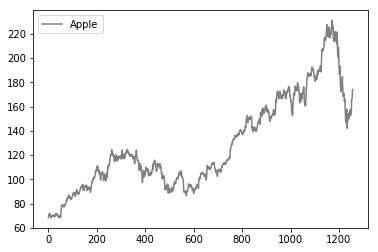

In [31]:
responseApple = requests.get('https://api.iextrading.com/1.0//stock/aapl/chart/5y')

priceApple = []
for a in responseApple.json()[:]:
    priceApple.append(a['close'])
plt.plot(priceApple,c='grey',label='Apple') 
leg = plt.legend(loc='best')
plt.show()

 Let's compare Apple stock performance with other tech giants: Google and Facebook.

In [32]:
responseApple = requests.get('https://api.iextrading.com/1.0//stock/aapl/chart/5y')
responseGoogle = requests.get('https://api.iextrading.com/1.0//stock/goog/chart/5y')
responseFacebook = requests.get('https://api.iextrading.com/1.0//stock/fb/chart/5y')

priceApple = []
priceGoogle = []
priceFacebook = []
for a,g,f in zip(responseApple.json()[:],responseGoogle.json()[:],responseFacebook.json()[:]):
    priceApple.append(a['close'])
    priceGoogle.append(g['close'])
    priceFacebook.append(f['close'])

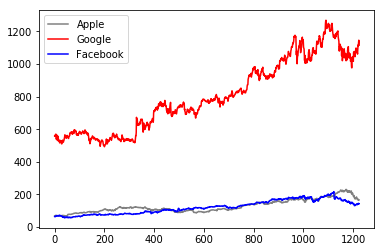

In [33]:
%matplotlib inline 
# the previous line is not needed if you are working in Spyder
import matplotlib.pyplot as plt 
plt.plot(priceApple,c='grey',label='Apple')
plt.plot(priceGoogle,c='red',label='Google')
plt.plot(priceFacebook,c='blue',label='Facebook')

leg = plt.legend(loc='best')
plt.show()

What about retrieving the latest news:

In [81]:
# response = requests.get('https://api.iextrading.com/1.0/stock/AAPL/batch?types=news&range=2m&last=15')
response = requests.get('https://api.iextrading.com/1.0/stock/market/news/last/5')
response.json()
for newsArticle in response.json():
    print(newsArticle['headline'], " - ", newsArticle['source'])

National Efforts To End HIV Epidemic Welcome, Must Include Access To Equitable And Nondiscriminatory Healthcare  -  PR Newswire
DOJ to probe conditions at N.Y. detention center  -  UPI
Mass. upholds Michelle Carter's involuntary manslaughter conviction  -  UPI
Pentagon shifts 250 U.S. troops to Texas border  -  UPI
SDG&E's 2019 Wildfire Mitigation Plan Builds On Past Successes To Further Strengthen Fire Preparedness & Safety  -  PR Newswire


What about the latest news related to Apple corporation?

In [82]:
response = requests.get('https://api.iextrading.com/1.0/stock/AAPL/news/last/2')
response.json()

[{'datetime': '2019-02-06T23:35:01-05:00',
  'headline': 'LVMH Shows Apple That The Chinese Consumer Is Doing Just Fine',
  'source': 'SeekingAlpha',
  'url': 'https://api.iextrading.com/1.0/stock/aapl/article/7333178812536622',
  'summary': "   LVMH-Mot Hennessy Louis Vuitton ( LVMHF ,  LVMUY ) released stellar  Q4 earnings  last week, as all segments and geographies delivered solid performance. The market was in search of reassurance on Chinese demand specifically, and the luxury goods giant didn't disappoint. In fact, LVMH's …",
  'related': 'AAPL,CHINA001,Computer Hardware,CON31167138,INTHPINK,LVMHF,LVMUY,NASDAQ01,Computing and Information Technology,WOMPOLIX',
  'image': 'https://api.iextrading.com/1.0/stock/aapl/news-image/7333178812536622'},
 {'datetime': '2019-02-06T19:10:00-05:00',
  'headline': 'Cramer Remix: After a 20-year hiatus, this stock is finally back',
  'source': 'CNBC',
  'url': 'https://api.iextrading.com/1.0/stock/aapl/article/6500261308320510',
  'summary': 'No 

Let's just print the latest 30 news headlines within the last month related to Google:

Obviously, to truly exploit an API, you need to spend some time reading the documentation so you know how to extract the relevant data you are looking for. For the previous finance API we have been using, you can find detailed documentation at: https://iextrading.com/developer/docs/#stocks

Finally, you can explore GitHub API. Substitute your own username and password for GitHub in the `auth` argument below. 

In [ ]:
response = requests.get('https://api.github.com/user', auth=('user', 'pass'))
#response.status_code
response.json()

At https://github.com/toddmotto/public-apis you can find many more public APIs offering tons of data some of which perhaps you find interesting/useful.

### API library wrappers

Sometimes the owner of the data decides to provide developers with the convenience of a programming language specific wrapper library to access the data. When an API wrapper is available, you don't need to work directly with HTTP requests and instead you work with language specific function calls.  

The twitter API for instance provides API wrapper libraries for many programming languages, including Python. For using the Twitter API you can `pip install` a Python wrapper module around the Twitter API (https://github.com/bear/python-twitter) which facilitates interaction with the API from within Python. In your command prompt, simply type:

In [ ]:
!pip install python-twitter

Next, you will need to register with Twitter and then create an APP at https://apps.twitter.com. Next, you will need to set up the python-twitter module with you API keys: https://python-twitter.readthedocs.io/en/latest/getting_started.html. You can then fill your own API key credentials in the following code snippet:

In [69]:
import twitter
#use your own API credentials here

api = twitter.Api(consumer_key="",
                  consumer_secret="",
                      access_token_key="",
                  access_token_secret="")

Let's start by getting the user timeline of a user with screen name @elonmusk:

In [70]:
import pandas as pd
## get the user timeline with screen_name = '@elonmusk'
twitter_statuses = api.GetUserTimeline(screen_name = '@elonmusk')

## create a data frame
## first get a list of panda Series or dict
pdSeriesList = [pd.Series(t.AsDict()) for t in twitter_statuses]

## then create the data frame
data = pd.DataFrame(pdSeriesList)

#let's just print the top 4 for illustration purposes
data.head(4)

,created_at,hashtags,id,id_str,lang,retweet_count,retweeted_status,source,text,urls,user,user_mentions,favorite_count,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,truncated,media
0,Thu Feb 07 01:35:35 +0000 2019,[],1093322348529278976,1093322348529278976,en,307,{'created_at': 'Wed Feb 06 16:42:57 +0000 2019...,"<a href=""http://twitter.com/download/iphone"" r...","RT @MusaTariq: This is not new news, but for a...",[],{'created_at': 'Tue Jun 02 20:12:29 +0000 2009...,"[{'id': 19606246, 'id_str': '19606246', 'name'...",NaN,NaN,NaN,NaN,NaN,NaN
1,Wed Feb 06 23:17:59 +0000 2019,[],1093287719294230529,1093287719294230529,en,26,NaN,"<a href=""http://twitter.com/download/iphone"" r...","@StrikMichael Sorry, many unexpected challenge...",[{'expanded_url': 'https://twitter.com/i/web/s...,{'created_at': 'Tue Jun 02 20:12:29 +0000 2009...,"[{'id': 1093183797141651463, 'id_str': '109318...",383.0,StrikMichael,1.093186e+18,1.093184e+18,True,NaN
2,Wed Feb 06 23:06:42 +0000 2019,[],1093284881386229761,1093284881386229761,und,929,NaN,"<a href=""http://twitter.com/download/iphone"" r...",@SpaceX https://t.co/sO2s0OcM4L,[{'expanded_url': 'https://www.whereisroadster...,{'created_at': 'Tue Jun 02 20:12:29 +0000 2009...,"[{'id': 34743251, 'id_str': '34743251', 'name'...",8187.0,SpaceX,1.093204e+18,3.474325e+07,NaN,NaN
3,Wed Feb 06 18:23:13 +0000 2019,[],1093213539848732673,1093213539848732673,en,3231,{'created_at': 'Wed Feb 06 17:44:09 +0000 2019...,"<a href=""http://twitter.com/download/iphone"" r...",RT @SpaceX: One year ago today https://t.co/lA...,[{'expanded_url': 'https://www.youtube.com/wat...,{'created_at': 'Tue Jun 02 20:12:29 +0000 2009...,"[{'id': 34743251, 'id_str': '34743251', 'name'...",NaN,NaN,NaN,NaN,NaN,NaN


Let's fetch those tweets from user @elonmusk with more than 20 retweets:

In [71]:
## filter tweets with enough retweet_count
maybe_interesting = data[data.retweet_count>20]

## get the text of these tweets
tweet_text = maybe_interesting.text

## print them out
text = tweet_text.values

for t in text:
    print('######')
    print(t)

######
RT @MusaTariq: This is not new news, but for anyone who works in commerce/product, whether you ever want to buy a @Tesla or not, I encourag…
######
@StrikMichael Sorry, many unexpected challenges with cars coming through Zeebrugge first time. Cars will start movi… https://t.co/W0sjRmwe0l
######
@SpaceX https://t.co/sO2s0OcM4L
######
RT @SpaceX: One year ago today https://t.co/lAjw1HC8d5
######
@FancyPantless We’re doing everything we can to get there. It’s a super hard grind.
######
@notNahuel @SnazzyQ Exactly. Both prices are shown right next to each other &amp; lower price is *actually* the real ap… https://t.co/YU64OyWjST
######
@Gargant44992081 VAT of ~20% &amp; import duties of ~10% usually result in a 30% higher cost in Europe
######
Model 3 starting cost now ~$35k (after ~$8k of credits &amp; fuel savings) https://t.co/46TXqRrsdr
######
RT @TeslaMotorsClub: Model 3 Tops Consumer Reports Satisfaction Survey #Model3 https://t.co/VgHhCakYa6
######
💙 Mach Diamonds 💙
######
@j

Finally, let's query twitter for all the tweets from user account `@elonmusk` mentioning the word **SpaceX**, since a given date, and let's limit the number of objects back to just 3.

In [72]:
results = api.GetSearch(raw_query="q=SpaceX&since=2016-09-19&from=elonmusk&count=3")
#print(results)
for r in results:
    print(r.text,"\n")

@SpaceX https://t.co/sO2s0OcM4L 

@jclishman @dguisinger @Erdayastronaut @DanielDavisA Will do, although SpaceX reddit is very well-informed. Really… https://t.co/KTzXNrIIRK 

First firing of Starship Raptor flight engine! So proud of great work by @SpaceX team!! https://t.co/S6aT7Jih4S 



### APIs Resources:

- <a href="https://market.mashape.com/explore">Mashape</a> and <a href="https://apigee.com/providers">Apigee</a> allow you to explore tons of different APIs. Alternatively, a <a href="http://www.pythonforbeginners.com/api/list-of-python-apis"> Python API wrapper</a> is available for many popular APIs.

- <a href="https://realpython.com/blog/python/api-integration-in-python/"> API Integration in Python</a> provides a very readable introduction to REST APIs.